In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import zipfile
% matplotlib inline

In [2]:
df = pd.read_csv('/Users/gregmurray/Documents/Data_Viz/2008.csv')

In [3]:
delfl = pd.read_csv('/Users/gregmurray/Documents/Data_Viz/DelayedFlights.csv')

In [76]:
df.head()

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4    926.0         930   1054.0   
4  2008      1           3          4   1829.0        1755   1959.0   

   CRSArrTime UniqueCarrier  FlightNum     ...      Diverted  CarrierDelay  \
0        2225            WN        335     ...             0           0.0   
1        1000            WN       3231     ...             0           0.0   
2         750            WN        448     ...             0           0.0   
3        1100            WN       1746     ...             0           0.0   
4        1925            WN       3920     ...             0           2.0   

   WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay Delayed DelayTime  \
0           0.0       0.0            0.0                0.0   False       0.0   
1           0.0       0.0            0.0                0.0   False       0.0   
2           0.0       0.0            0.0                0.0   False       0.0   
3           0.0       0.0            0.0                0.0   False       0.0   
4           0.0       0.0            0.0               32.0    True      34.0   

   CRSDepTime1  CRSDepTime2  
0         1955           19  
1         0735            7  
2         0620            6  
3         0930            9  
4         1755           17  

[5 rows x 33 columns]

## AIRLINE CARRIERS AND DELAYS

In [3]:
df['Delayed'] = df['CarrierDelay'] + df['WeatherDelay'] + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay'] > 10

In [6]:
df = df.fillna(0)
delfl = delfl.fillna(0)

In [7]:
car_df = pd.DataFrame(delfl.groupby("UniqueCarrier")["CarrierDelay"].mean())

In [8]:
car_df["Carrier"] = car_df.index

In [9]:
airline_codes = pd.read_csv("/Users/gregmurray/Documents/airlinedelaycauses/airline_codes.csv")

In [10]:
#Join airline names csv to map names to carrier codes
car_df2 = pd.merge(car_df, airline_codes, how='left', left_on="Carrier", right_on="ATA")

In [11]:
car_df2 = car_df2[["Carrier", "Airline", "CarrierDelay"]]

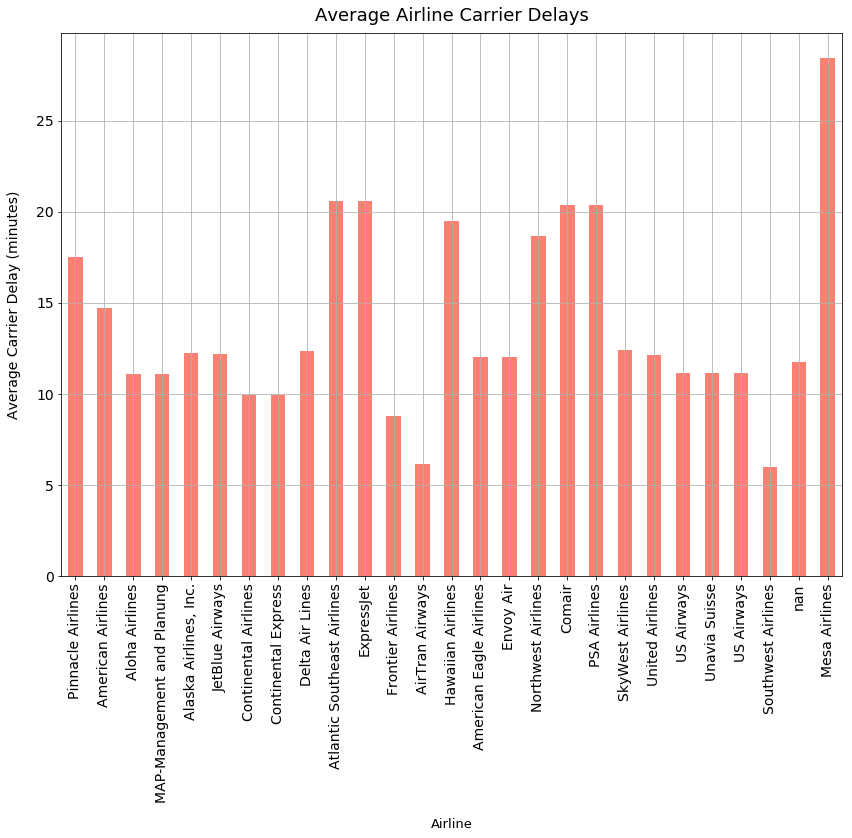

In [13]:
#bar graph of average carrier-caused delay for each airline
car_df2.set_index(['Airline'])['CarrierDelay'].plot(kind='bar', figsize=(14, 10), grid=True, fontsize=14, color='salmon')
plt.title("Average Airline Carrier Delays", fontsize=18, y=1.01)
plt.xlabel("Airline", fontsize=13, labelpad=15)
plt.ylabel("Average Carrier Delay (minutes)", fontsize=14, labelpad=15)

ANALYSIS:
The major airline carriers, US Airways, United Airlines, and Southwest Airlines appear to have limited carrier-caused 
delay times on average. Conversely, all the carrier who shoulder the blame for the longest extended wait times are 
smaller airlines like Hawaii, Comair, and Atlantic Southeast. Lastly, Mesa Airlines is clearly the worst airline for 
those fliers who lack patience or loose schedules.

In [14]:
#Create df with percent of flights that are delayed for each carrier
car_perc_df = pd.DataFrame(100*delfl.groupby("UniqueCarrier")['Year'].count()/df.groupby("UniqueCarrier")['Year'].count())

In [15]:
car_perc_df.head()

Year
UniqueCarrier           
9E             19.787726
AA             31.719252
AQ              9.615385
AS             26.004288
B6             28.208842

In [20]:
car_perc_df["Carrier"]=car_df.index

In [26]:
car_perc_df=car_perc_df.rename(columns={'Year':'Percent Delayed'})

In [27]:
#Join airline name csv to map carrier codes to names
car_perc_df2 = pd.merge(car_perc_df, airline_codes, how='left', left_on="Carrier", right_on="ATA")

In [28]:
car_perc_df2.head()

Percent Delayed Carrier ATA ICAO                     Airline Call sign  \
0        19.787726      9E  9E  FLG           Pinnacle Airlines  FLAGSHIP   
1        31.719252      AA  AA  AAL           American Airlines  AMERICAN   
2         9.615385      AQ  AQ  AAH              Aloha Airlines     ALOHA   
3         9.615385      AQ  AQ  MPJ  MAP-Management and Planung    MAPJET   
4        26.004288      AS  AS  ASA       Alaska Airlines, Inc.    ALASKA   

  Country/Region  
0  United States  
1  United States  
2  United States  
3        Austria  
4  United States

In [29]:
car_perc_df2 = car_perc_df2[["Carrier", "Airline", "Percent Delayed"]]

In [30]:
sns.set(font_scale=1.5)

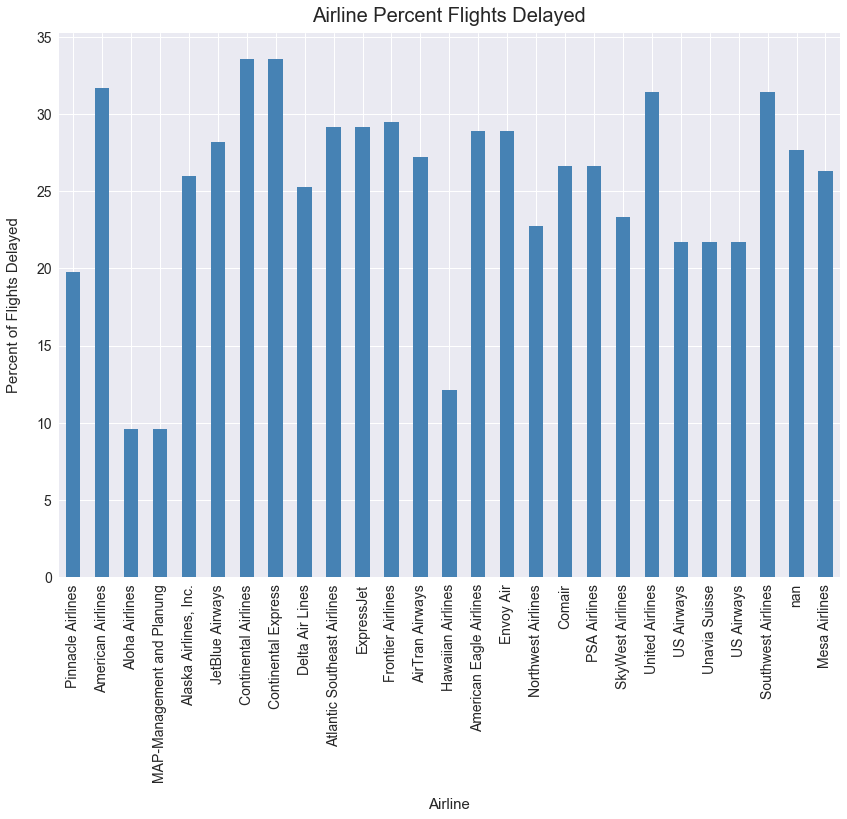

In [36]:
#bar graph of percent delayed for each airline
car_perc_df2.set_index(['Airline'])['Percent Delayed'].plot(kind='bar', figsize=(14, 10), grid=True, fontsize=14, color='steelblue')
plt.title("Airline Percent Flights Delayed", fontsize=20, y=1.01)
plt.xlabel("Airline", fontsize=15, labelpad=15)
plt.ylabel("Percent of Flights Delayed", fontsize=15, labelpad=15)

ANALYSIS: Unlike the average carrier delay times, the major airlines have the highest percentage of flights delayed. 
Interestingly, contrary to their laid-back image, the airlines representing Hawaii boast the most punctual departures
of any carrier.

TIMES AND SEASONALITY

In [28]:
df['CRSDepTime1'] = df['CRSDepTime'].apply(lambda x: '{0:0>4}'.format(x))

In [29]:
df['CRSDepTime2'] = df['CRSDepTime1'].astype(str)

In [30]:
df.CRSDepTime2 = df.CRSDepTime2.str.slice(0, 2)

In [49]:
df['CRSDepTime2']=df['CRSDepTime2'].astype(int)

In [41]:
#Create df with percent of flights that are delayed for each day of the week
dfDelaysPerc = pd.DataFrame(df[df['Delayed']==True].groupby(['DayOfWeek', 'CRSDepTime2'])['Year'].count()*100/df.groupby(['DayOfWeek', 'CRSDepTime2'])['Year'].count())

In [42]:
dfDelays = dfDelaysPerc

In [43]:
dfDelaysByhour = dfDelays.unstack(level=0)

In [44]:
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
day_Hours = ['12am', '1am', '2am', '3am', '4am', '5am', '6am','7am','8am','9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']

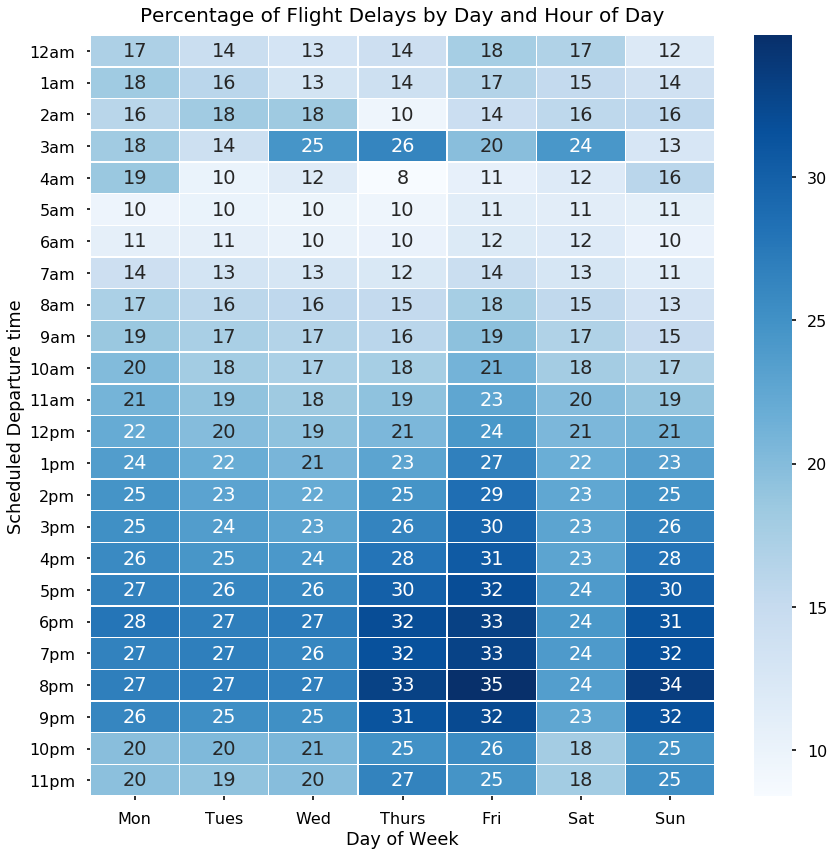

In [45]:
#Create heatmap of the percent of flights delayed for each time of each day of the week
sns.set_context("poster")
f, ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(dfDelaysByhour, annot=True, fmt="0.0f", linewidths=.5, ax=ax, xticklabels=day_short_names, yticklabels=day_Hours, cmap="Blues")
ax.axes.set_title("Percentage of Flight Delays by Day and Hour of Day", fontsize=20, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Scheduled Departure time');

In [37]:
dfDelaysPerc_Mon = pd.DataFrame(delfl.groupby(['Month', 'DayofMonth'])['Year'].count()*100/df.groupby(['Month', 'DayofMonth'])['Year'].count())
dfDelays_Mon = dfDelaysPerc_Mon

In [38]:
dfDelaysByMonth = dfDelays_Mon.unstack(level=0)

In [39]:
month_short_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

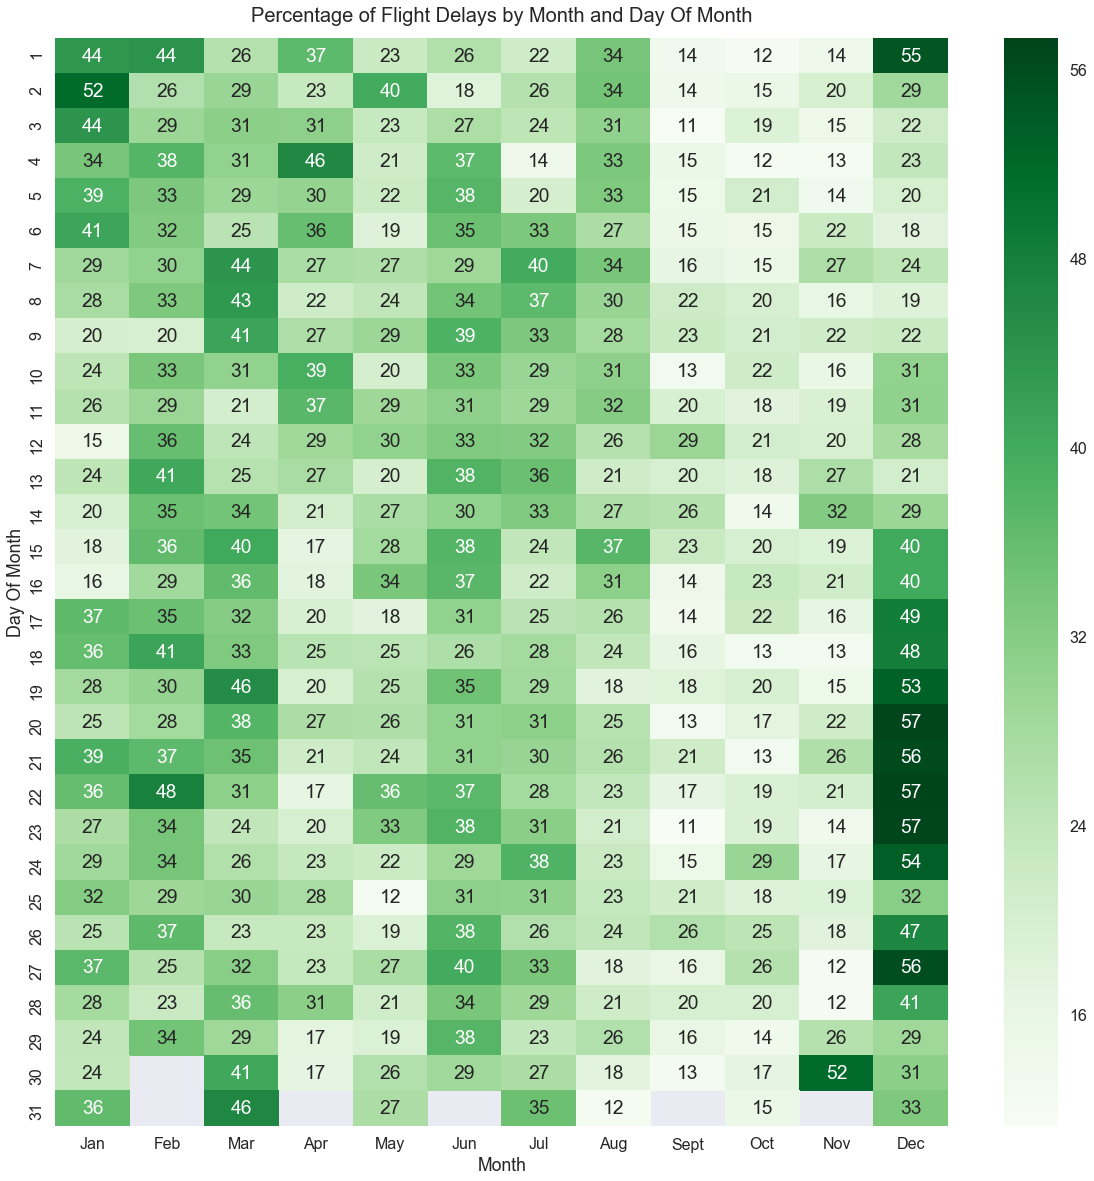

In [40]:
sns.set_context("poster")
f, ax1 = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(dfDelaysByMonth, annot=True, fmt="0.0f", ax=ax1, xticklabels=month_short_names, cmap="Greens")
ax.axes.set_title("Percentage of Flight Delays by Month and Day Of Month", fontsize=20, y=1.01)
ax.set(xlabel='Month', ylabel='Day Of Month');

GEOGRAPHY AND AIRPORT SIZE

In [44]:
AirportLoc = pd.read_csv("/Users/saronakenny/Documents/SCUSummerQuarter2018/Data Viz/airports2.dat", sep=',', header=0, skipinitialspace=True)

In [45]:
AirportLoc.columns = ['AirportID',
               'Name',
               'City',
               'Country',
               'IATA',
               'ICAO',
               'Lat',
               'Lon',
               'Alt',
               'TimeZone',
               'DST',
               'time',
               'zone',
               'type',
               ]

In [46]:
AirportLoc.drop(['AirportID'],axis=1,inplace=True)
AirportLoc.drop(['Name'],axis=1,inplace=True)
AirportLoc.drop(['Country'],axis=1,inplace=True)
AirportLoc.drop(['ICAO'],axis=1,inplace=True)
AirportLoc.drop(['Alt'],axis=1,inplace=True)
AirportLoc.drop(['TimeZone'],axis=1,inplace=True)
AirportLoc.drop(['DST'],axis=1,inplace=True)
AirportLoc.drop(['time'],axis=1,inplace=True)
AirportLoc.drop(['zone'],axis=1,inplace=True)
AirportLoc.drop(['type'],axis=1,inplace=True)
AirportLoc['city'] = AirportLoc['City']
AirportLoc.drop(['City'],axis=1,inplace=True)
AirportLoc.head()

IATA       Lat         Lon          city
0  MAG -5.207080  145.789001        Madang
1  HGU -5.826790  144.296005   Mount Hagen
2  LAE -6.569803  146.725977        Nadzab
3  POM -9.443380  147.220001  Port Moresby
4  WWK -3.583830  143.669006         Wewak

In [47]:
AirportLoc.columns = ['Airport',
              'Lat',
              'Lon',
              'City']

In [48]:
AirportLoc.head()

Airport       Lat         Lon          City
0     MAG -5.207080  145.789001        Madang
1     HGU -5.826790  144.296005   Mount Hagen
2     LAE -6.569803  146.725977        Nadzab
3     POM -9.443380  147.220001  Port Moresby
4     WWK -3.583830  143.669006         Wewak

In [7]:
zf = zipfile.ZipFile('/Users/saronakenny/Documents/SCUSummerQuarter2018/Data Viz/DelayedFlights.csv.zip') 
DelayedFlights = pd.read_csv(zf.open('DelayedFlights.csv'))

In [8]:
DelayedFlights = DelayedFlights.fillna(0)

In [9]:
Airports = DelayedFlights['Origin'].unique()
Airports.sort()

In [10]:
DelayedFlights = DelayedFlights.groupby('Origin').count()

In [11]:
zf2 = zipfile.ZipFile('/Users/saronakenny/Documents/SCUSummerQuarter2018/Data Viz/2008.csv.zip') 
AllFlights = pd.read_csv(zf2.open('2008.csv'))

In [12]:
AllFlights = AllFlights.fillna(0)

In [13]:
TotalFlights = AllFlights.groupby('Origin').count()

In [14]:
DelayedFlights['TotalFlights'] = TotalFlights['LateAircraftDelay']

In [15]:
DelayedFlights['Airport'] = Airports

In [16]:
DelayedFlights['PercentofDelayedFlights'] = round(((DelayedFlights['LateAircraftDelay']/DelayedFlights['TotalFlights'])*100),2)

In [17]:
DelayedFlights.drop(DelayedFlights.iloc[:, 0:28], inplace=True, axis=1)

In [49]:
MergeNEW = pd.merge( AirportLoc, DelayedFlights, on = 'Airport', how = 'right')

In [50]:
MergeNEW2 = MergeNEW.sort_values(by=['LateAircraftDelay'], ascending = False)

In [20]:
from plotly import __version__
from plotly.offline import init_notebook_mode, plot
from plotly.graph_objs import Scatter

init_notebook_mode()

# Need to run this in terminal for bubble map to show up 
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [22]:
import plotly as py

In [52]:
MergeNEW2['text'] = MergeNEW2['Airport'] + ': ' + MergeNEW2['City'] + ' <br>Number Of Delays: ' + (MergeNEW2['LateAircraftDelay']).astype(str) + '<br>' + (MergeNEW2['PercentofDelayedFlights']).astype(str) + '% of flights delayed'
limits = [(0,2), (3,302)]
colors = ["rgb(255,65,54)","rgb(0,116,217)"]
names = ['125979 to 131613 delays', 'less than 1295979']
airports = []
scale = 50

for i in range(len(limits)):
    lim = limits[i]
    df_sub1 = MergeNEW2[lim[0]:lim[1]]
    airport = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub1['Lon'],
        lat = df_sub1['Lat'],
        text = df_sub1['text'],
        marker = dict(
            size = df_sub1['LateAircraftDelay']/scale,        
            colors = colors [i],
            line = dict(width=1, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = names[i])
    airports.append(airport)

layout = dict(
        title = 'Amount of Delays per US Airport in 2008<br>(Click Legend to Toggle Traces)',
        showlegend = (True),
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)",
    ),
)
fig2 = dict( data=airports, layout=layout )
py.offline.iplot( fig2, validate=False, filename='d3-bubble-map-populations' )